Este workshop será llevado a cabo por las comunidades [Women in Bioinformatic and Data Science in Latam](https://wbds.la) y [Bioinfo4Women](https://bioinfo4women.bsc.es/).

**A cargo de**: Ana Julia Velez Rueda(WBDS LA),
Mercedes Didier Garnham (WBDS LA) y Victoria Ruiz (B4W) y Mónica Cabrera (B4W)


## **Licencia**
**Autoras**: Este material fué confeccionado por Ana Julia Velez Rueda(WBDS LA),
Mercedes Didier Garnham (WBDS LA). Se basa en el material educativo disponible en [Fundamentos de Informática](https://github.com/AJVelezRueda/Fundamentos_de_informatica) (Autores: AJVelezRueda y BenitezG) y **se encuetra bajo licencia de 
[Creative Commons Attribution-ShareAlike 4.0 International License][cc-by-sa]**. 


[![CC BY-SA 4.0][cc-by-sa-image]][cc-by-sa]

[cc-by-sa]: http://creativecommons.org/licenses/by-sa/4.0/
[cc-by-sa-image]: https://licensebuttons.net/l/by-sa/4.0/88x31.png
[cc-by-sa-shield]: https://img.shields.io/badge/License-CC%20BY--SA%204.0-lightgrey.svg

# **Quienes somos?**

### **[Women in Bioinformatics and Data Science LA](https://wbds.la)**
Somos una comunidad de mujeres que trabajan en las áreas de Bioinformática y Ciencia de Datos creada en 2019 con el objetivo de difundir y dar visibilidad a la investigación que realizan las mujeres en estas áreas. También buscamos crear redes y colaboración dentro de la comunidad de mujeres científicas del sector público y privado, nuestros proyectos tienen como objetivo reunir a investigadores de América Latina que trabajan en las áreas de biología de sistemas, tecnologías ómicas, inteligencia artificial, aprendizaje automático, ciencia de datos, minería de datos y computación de alto rendimiento con aplicaciones en biología del sector público y privado.

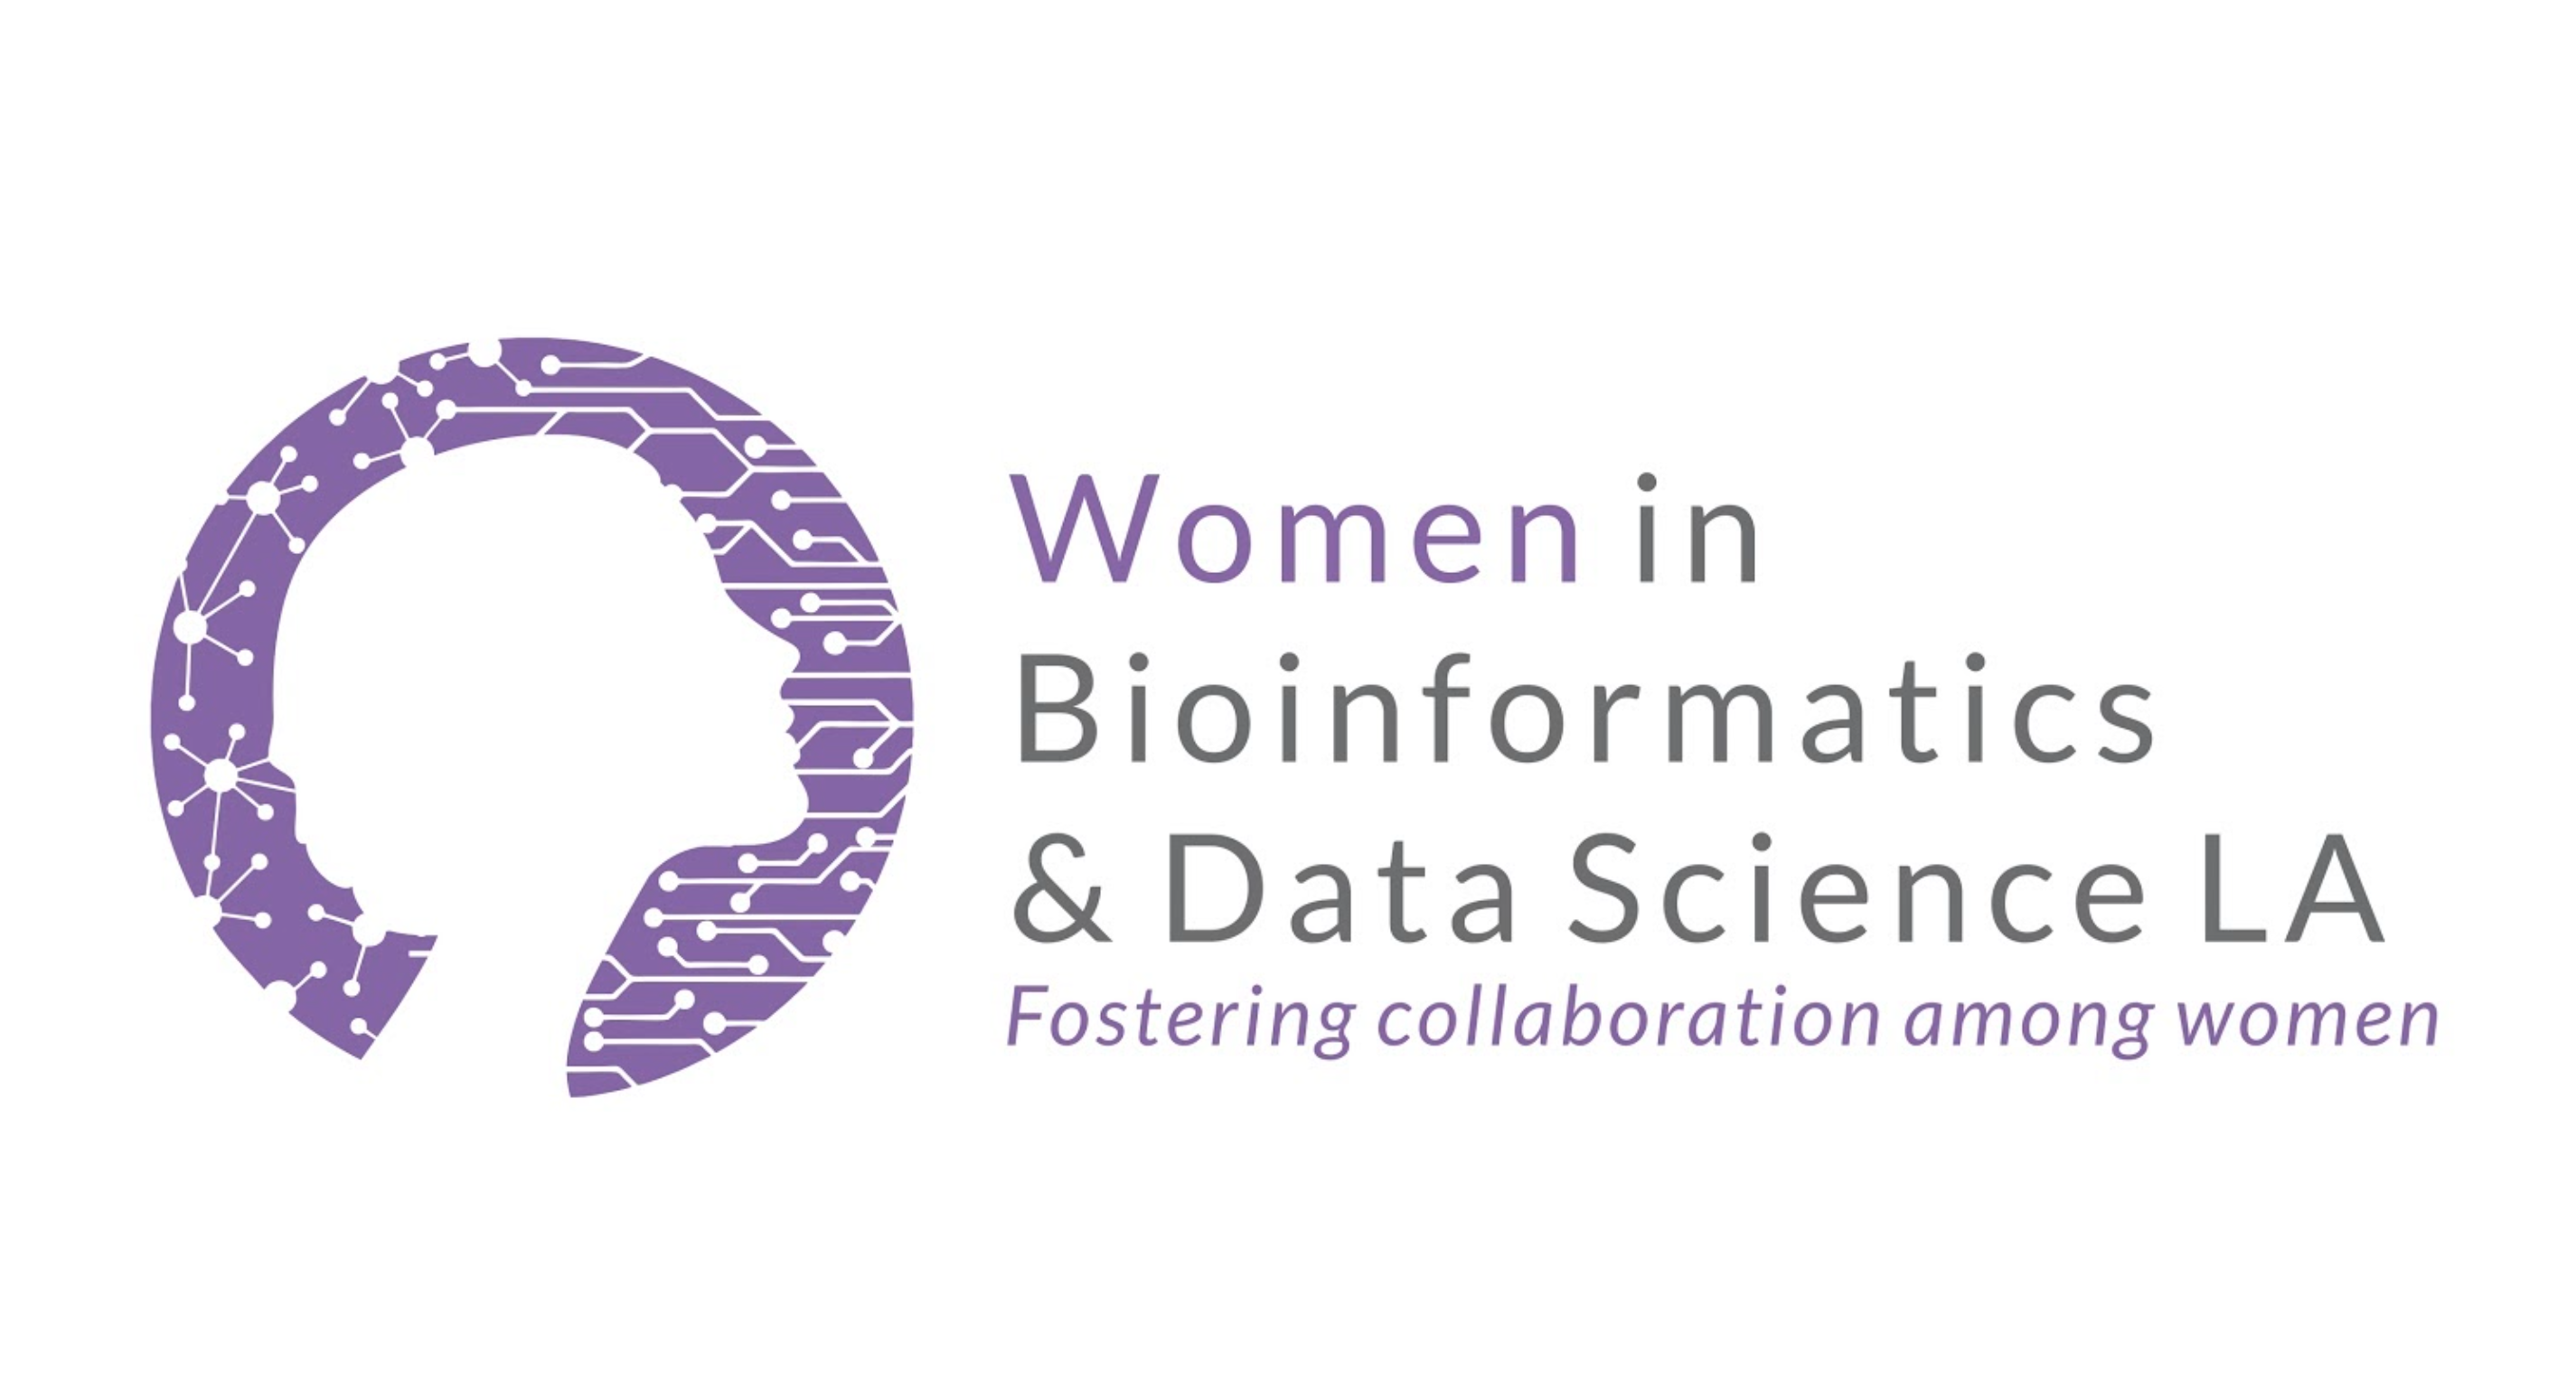

### [Bioinfo4Women](https://https://bioinfo4women.bsc.es/)

BIOINFO4WOMEN is an initiative from the Life Sciences Department at the BSC to promote the research done by women in computational biology, with special focus on their transition from postdoc to junior independent positions. B4W supports researchers in computational biology by promoting the exchange of knowledge and experience of outstanding women researchers through activities such as seminars, conferences, training opportunities, and mentorships. B4W seeks to give greater visibility to the contribution of women in different fields of biology, with a particular focus on the areas of personalised medicine, bioinformatics and HPC. Ultimately, B4W aims at building a more collaborative, supportive, and equal scientific community that benefits society as a whole.



---


## **Primeros pasos en entornos Jupyter Like**



## **Hola Python!**

In [ ]:
## Intro a python

# **Antes que nada, pero después de la intro**
Hoy aprenderemos a manipular y analizar datos con Pandas, una biblioteca de Python. Para este recorrido necesitarás las librerías [Pandas](https://pandas.pydata.org/) y [Seaborn](https://seaborn.pydata.org/)


Podés corroborar si las tienes instaladas corriendo las siguientes líneas en tu intérprete de Python:

```python
    import pandas as pd
    import seaborn as sns
```

Si correr estas líneas no tira ningún error, entonces están felizmente instaladas las bibliotecas en cuestión. De lo contrario, obtendremos un mensaje de error `ModuleNotFoundError: No module named` al correr las lineas anteriores. En tal caso, podés instalar las bibliotecas desde la consola, con el comando:

```bash
        pip install pandas
        pip install seaborn
```
También lo podés instalar desde un jupyter notebook con los comandos:

```python
        !pip install pandas
        !pip install seaborn
```

Vamos a importar todas las librerias que vamos a usar en este análisis

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
from google.colab import drive
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# **Introducción a Pandas**

En este recorrido vamos a adentrarnos en el mundo de los datos, y para ello utilizaremos Pandas, una biblioteca de Python que nos permite trabajar con archivos de formato definido: CSV, un excel, etc. Además, Pandas proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para que trabajar con datos "relacionales" o "etiquetados" sea fácil e intuitivo. En criollo: Pandas es como en excel, pero super duper!

> Para pensar 🤔: Si hasta aquí no te has preguntado qué es una bliblioteca, ¡es momento de hacerse esa pregunta! ¿Para qué creés que nos puede resultar útil esta biblioteca? ¿Cuál es la ventaja de usar Pandas? ¿Por qué no solo usar Python `"de a pie"`?
>

Pandas soporta múltipes tipos de datos:

- Datos tabulares con columnas de tipo heterogéneo, como en una tabla SQL o en una hoja de cálculo de Excel.
- Datos ordenados y desordenados (no necesariamente frecuencia fija).
- Datos matriciales arbitrarios (homogéneamente tipados o heterogéneos) con etiquetas de fila y columna.
- Cualquier otra forma de conjuntos de datos observacionales/estadísticos. 

Los datos en realidad no necesitan ser etiquetados para ser colocados en una estructura de datos de pandas. Estas estructuras se construyen a partir de arrays (listas), pero agregando nuevas funcionalidades. Pandas maneja dos estructuras de datos: Series y DataFrames.

### **Series (1-dimensional)**


Las series pueden contener cualquier tipo de datos (enteros, cadenas, números de punto flotante, etc.). Y se pueden crear del siguiente modo:


In [ ]:
una_serie = pd.Series(['Peru', 'Argentina', 'Bolivia', 'Uruguay', 'Brasil', 'Chile'], dtype='string')

print(una_serie)

0         Peru
1    Argentina
2      Bolivia
3      Uruguay
4       Brasil
5        Chile
dtype: string


### **DataFrame (2-dimensiones)**

Un **DataFrame** es una estructura tabular bidimensional de datos tabulares, potencialmente heterogéneos, con ejes etiquetados (filas y columnas). 

Podemos crear un DataFrame del sigueinte modo:

In [ ]:
paises_latam = pd.DataFrame(data ={"Pais": ['Peru', 'Argentina'], "Lengua oficial": ['Español', 'Español']}, index = [1,2])

print(paises_latam)

        Pais Lengua oficial
1       Peru        Español
2  Argentina        Español


🛑 Alerta: los valores asociados a las claves del diccionario deben ser listas del mismo tamaño

`df` es el nombre génerico para designar DataFrame y es el nombre que utilizaremos de ahora en más para mayor simplicidad.

### **Nuestros datos**
Otra forma muy usual de generar DataFrames es mediante la lectura de **archivos estructurados**. Existen muchas formas de cargar/leer información desde archivos la información desde archivos pero en general la diferencia radica principalmente en los parámetros por defecto que toman para definir las columnas. Por ejemplo: 

- El caracter de separación de columnas por defecto del método `read_cvs` es una coma (',') 
- El caracter de separación de columnas por defecto del método `read_fwf` es una tab ('\t').


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()
#path = '/content/drive/MyDrive/Workshop/'
path = '/content/drive/MyDrive/Events_organization/Workshops_shared_with_other_orgas/Workshop - Introducción a Python + Filogenia/Mutaciones_Spike_SARS2'
os.chdir(path)

data = 'GISAID_version20210703_S_mutations_table.csv'

tabla_mutaciones = pd.read_csv(data, header=0, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Vamos a inspeccionar la tabla usando el método .head():

In [ ]:
tabla_mutaciones.head(10)

,Protein,AA_position,UniProt_position,WT_residue,Mutated_residue,n_Muts,n_Seqs_Local,Mutation_frequency,Location,date,month,year
0,S,32,32,F,I,1,22,0.04545,Wuhan,2019-12-01,dic,"2,019"
1,S,32,32,F,V,1,22,0.04545,Wuhan,2019-12-01,dic,"2,019"
2,S,1143,1143,P,L,1,14,0.07143,Australia,2020-01-01,ene,"2,020"
3,S,247,247,S,R,1,14,0.07143,Australia,2020-01-01,ene,"2,020"
4,S,614,614,D,G,1,14,0.07143,Australia,2020-01-01,ene,"2,020"
5,S,861,861,L,K,1,21,0.04762,Beijing,2020-01-01,ene,"2,020"
6,S,970,970,F,S,1,21,0.04762,Beijing,2020-01-01,ene,"2,020"
7,S,860,860,V,Q,1,21,0.04762,Beijing,2020-01-01,ene,"2,020"
8,S,570,570,A,V,3,21,0.14286,Beijing,2020-01-01,ene,"2,020"
9,S,13,13,S,I,1,36,0.02778,Canada,2020-01-01,ene,"2,020"


Podemos llamar o referir a una columna del DataFrame del siguiente modo:

``` python
  df["nombre_de_columna de interes"]
```

Y por ejemplo, podemos acceder a la lista de datos de una columna dada con el método `tolist()`:

``` python
tabla_mutaciones['Location'].tolist()
```

Por ejemplo podemos extraer la lista de ciudades que tienen registrados los casos:

In [ ]:
tabla_mutaciones['Location'].tolist()

['Wuhan',
 'Wuhan',
 'Australia',
 'Australia',
 'Australia',
 'Beijing',
 'Beijing',
 'Beijing',
 'Beijing',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'France',
 'France',
 'France',
 'Germany',
 'Germany',
 'Guangdong',
 'Guangdong',
 'Guangdong',
 'Guangdong',
 'Guangzhou',
 'Hangzhou',
 'Henan',
 'Henan',
 'HongKong',
 'HongKong',
 'HongKong',
 'India',
 'India',
 'Japan',
 'Jian',
 'Jiangsu',
 'Nanchang',
 'Nanchang',
 'Norway',
 'Norway',
 'Norway',
 'Pingxiang',
 'Poland',
 'Poland',
 'Qatar',
 'Qatar',
 'Qatar',
 'Shandong',
 'Shandong',
 'Shandong',
 'Shandong',
 'Shanghai',
 'Shanghai',
 'Shanghai',
 'Shanghai',
 'Shanghai',
 'Shanghai',
 'Shanghai',
 'Shenzhen',
 'Shenzhen',
 'Shenzhen',
 'Shenzhen',
 'Sichuan',
 'Sichuan',
 'Sichuan',
 'Sichuan',
 'Sichuan',
 'Sichuan',
 'SouthKorea',
 'Thailand',
 'Thailand',
 'USA_CA',
 'Weifang',
 'Weifan

Podemos también conocer los valores únicos para esa columna, es decir qué ciudades aparecen, utilizando el método .unique():

In [ ]:
tabla_mutaciones['Location'].unique()

array(['Wuhan', 'Australia', 'Beijing', 'Canada', 'France', 'Germany',
       'Guangdong', 'Guangzhou', 'Hangzhou', 'Henan', 'HongKong', 'India',
       'Japan', 'Jian', 'Jiangsu', 'Nanchang', 'Norway', 'Pingxiang',
       'Poland', 'Qatar', 'Shandong', 'Shanghai', 'Shenzhen', 'Sichuan',
       'SouthKorea', 'Thailand', 'USA_CA', 'Weifang', 'Xinyu', 'Yunnan',
       'Zhejiang', 'Anhui', 'Austria', 'Belgium', 'Brazil', 'Chile',
       'CzechRepublic', 'Denmark', 'England', 'Finland', 'Fuzhou',
       'Gansu', 'Greece', 'Iceland', 'Iran', 'Israel', 'Italy', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'Nigeria', 'NorthernIreland', 'Panama',
       'SaintBarthelemy', 'SaudiArabia', 'Scotland', 'Senegal',
       'Shangrao', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Tianmen', 'UnitedArabEmirates', 'USA_CruiseA',
       'USA_FL_5125', 'USA_GA_2741', 'USA_GA_2742', 'USA_NH_0004',
       'USA_NV', 'USA_OH', 'USA_RI_0

Podemos operar con las columnas con los operadores relacionales y matemáticos que ya conoces:

``` python
tabla_mutaciones['Mutation_frequency'] * 100
tabla_mutaciones['Mutation_frequency'] > 0.015  
tabla_mutaciones['Mutation_frequency'] == 1
```          
> Para pensar 🤔: ¿Qué resultado nos daría en cada caso? 

Pero los operadores tambien nos sirven también para filtrar nuestro DataFrame:

In [ ]:
tabla_mutaciones[tabla_mutaciones['Mutation_frequency'] == 1]

,Protein,AA_position,UniProt_position,WT_residue,Mutated_residue,n_Muts,n_Seqs_Local,Mutation_frequency,Location,date,month,year
29,S,614,614,D,G,11,11,1.0,Germany,2020-01-01,ene,"2,020"
36,S,28,28,Y,D,1,1,1.0,Henan,2020-01-01,ene,"2,020"
37,S,29,29,T,I,1,1,1.0,Henan,2020-01-01,ene,"2,020"
48,S,54,54,L,F,1,1,1.0,Norway,2020-01-01,ene,"2,020"
49,S,138,138,D,Y,1,1,1.0,Norway,2020-01-01,ene,"2,020"
...,...,...,...,...,...,...,...,...,...,...,...,...
172721,S,484,484,E,K,1,1,1.0,USA_VT,2021-06-01,Jun,"2,021"
172722,S,5,5,L,F,1,1,1.0,USA_VT,2021-06-01,Jun,"2,021"
172723,S,253,253,D,G,1,1,1.0,USA_VT,2021-06-01,Jun,"2,021"
172724,S,701,701,A,V,1,1,1.0,USA_VT,2021-06-01,Jun,"2,021"


Para pensar 🤔: ¿Cómo buscarías los valores de frecuencia mayores a 0.5? 

Podemos averiguar el tipo de datos que son nuestra tabla haciendo df.dtypes

In [ ]:
tabla_mutaciones.dtypes

Protein                object
AA_position             int64
UniProt_position        int64
WT_residue             object
Mutated_residue        object
n_Muts                  int64
n_Seqs_Local            int64
Mutation_frequency    float64
Location               object
date                   object
month                  object
year                   object
dtype: object

Podemos convertir los datos de una columna en otro tipo de dato con el método .astype()

In [ ]:
tabla_mutaciones['WT_residue'].astype(str)

0         F
1         F
2         P
3         S
4         D
         ..
173033    A
173034    A
173035    S
173036    D
173037    A
Name: WT_residue, Length: 173038, dtype: object

Antes de comenzar con el análisis, vamos a limpiar el set de datos.
Vamos a ver la distribución de la tabla:

In [ ]:
tabla_mutaciones.groupby(['Location']).sum()

,AA_position,UniProt_position,n_Muts,n_Seqs_Local,Mutation_frequency
Location,,,,,
1,920926,920926,2213,22114880,0.00000
2,990491,990491,2774,13973073,0.00000
3,693614,693614,2274,7564879,0.00000
4,392327,392327,1677,4198992,0.00000
5,242148,242148,1493,2990615,0.00000
...,...,...,...,...,...
Yunnan,1556,1556,7,8,3.50000
Zambia,33211,33211,570,2916,522.52247
Zhejiang,6148,6148,32,56,257.95000


In [ ]:
tabla_mutaciones_USA = tabla_mutaciones[tabla_mutaciones['Location'].str.contains('USA')]
print(tabla_mutaciones_USA.groupby(['Location']).sum())
print("Hay ")
print(len(tabla_mutaciones_USA))
print("datos de USA")

             AA_position  UniProt_position  n_Muts  n_Seqs_Local  \
Location                                                           
USA-IN               614               614       1             1   
USA_AK            249193            249193    8841        161384   
USA_AL            398019            398019    7393        211479   
USA_AR            181235            181235    3859         46661   
USA_AZ           1089205           1089205   42243       2400455   
...                  ...               ...     ...           ...   
USA_WA_0432          520               520       1             1   
USA_WI            922108            922108   48643       2087171   
USA_WV            452864            452864   27282        842435   
USA_WY            528487            528487   17096       1029927   
USA_un            162532            162532    1702         19074   

             Mutation_frequency  
Location                         
USA-IN                  1.00000  
USA_AK       

In [ ]:
tabla_mutaciones_world = tabla_mutaciones[~tabla_mutaciones['Location'].str.contains('USA')]
print(tabla_mutaciones_world.groupby(['Location']).sum())
print("Hay ")
print(len(tabla_mutaciones_world))
print("datos del resto de los paises")

          AA_position  UniProt_position  n_Muts  n_Seqs_Local  \
Location                                                        
1              920926            920926    2213      22114880   
2              990491            990491    2774      13973073   
3              693614            693614    2274       7564879   
4              392327            392327    1677       4198992   
5              242148            242148    1493       2990615   
...               ...               ...     ...           ...   
Yunnan           1556              1556       7             8   
Zambia          33211             33211     570          2916   
Zhejiang         6148              6148      32            56   
Zimbabwe        61593             61593    1504          7391   
dog              1016              1016       3             3   

          Mutation_frequency  
Location                      
1                    0.00000  
2                    0.00000  
3                    0.00000  

Según la distribución de los datos, es conveniente analizar los datos provenientes de USA y del resto del mundo por separado. 
Vamos a analizar los del resto del mundo 🌍

In [ ]:
tabla_mutaciones = tabla_mutaciones_world



---




## Tratamiento de datos faltantes y limpieza de los datos

Las tablas pueden venir con celdas sin datos, podemos eliminarlas dependiendo el uso que vamos a darle a los datos. 

Para eliminar las filas con celdas vacías podemos usar:


```
df.dropna()
```

Para reemplazar la celda vacía por un valor determinado podemos usar:



```
df.fillna(value)
```

También podemos eliminar las filas duplicadas con:



```
df.drop_duplicates()
```

# Vamos a probar el efecto que estos tratamientos tienen en la tabla de mutaciones


In [ ]:
tabla_mutaciones_1 = tabla_mutaciones.dropna()

In [ ]:
N=5
tabla_mutaciones_2 = tabla_mutaciones.dropna(thresh=N,axis=1)

In [ ]:
value = 0
tabla_mutaciones_3 = tabla_mutaciones.fillna(value)

In [ ]:
tabla_mutaciones_4 = tabla_mutaciones.drop_duplicates()

Veamos que efecto que tienen cada una de las acciones que realizamos recién:

Seleccioná el mejor tratamiento para los datos y seguí adelante con el trabajo

Vamos a ahora a ver un poco la coherencia de los datos, por ejemplo tomemos la columna _Mutation_frequency_ y hagamos una descripción estadística básica: máximo, mínimo y media.

Para ello podemos usar los  métodos _min()_ ,_max()_ y _mean()_, usando la sintaxis 



```
#calculo de valor mínimo de la columna
df[column_name].min()

#calculo de valor máximo de la columna
df[column_name].max()

#calculo de valor medio de la columna
df[column_name].mean()
```

¿Te animás a escribir vos el código para obtener estos valores de la columna de interés?

¿Qué observas? ¿Son valores esperables para un cálculo de frecuencia? Proponé una forma de limpiar los datos respecto de esa columna

# Agrupamientos y filtrados
Podemos realizar la selección y el filtrado de columnas con pandas.

Para agrupar por una columna podemos usar:
```
df.groupby(['Columna'])
```

Para filtrar la tabla y seleccionar sólo ciertas columnas podemos usar: 

```
df.filter(['Columna1', 'Columna2', 'Columna3'])
```

Podemos tomar una subselección al azar de la tabla usando:


```
df.sample(N)
```

#Probemos esto en la tabla de mutaciones:

Seleccioná la columna "AA_position" de la tabla de mutaciones

Una vez seleccionada la columna podés realizar la suma de los valores o calcular el promedio:.

A continuación te mostramos uun ejemplo con la columna "Mutation_frequency" de la tabla de mutaciones

In [ ]:
tabla_mutaciones.groupby(['Mutation_frequency'])
print(tabla_mutaciones.groupby(['Mutation_frequency']).sum())
print(tabla_mutaciones.groupby(['Mutation_frequency']).mean())

                    AA_position  UniProt_position  n_Muts  n_Seqs_Local
Mutation_frequency                                                     
0.00000                 4225024           4225024   16430      58899883
0.00002                 1015291           1015291    1684      83020931
0.00003                  773487            773487    1287      39352265
0.00004                 1190918           1190918    2508      64483687
0.00005                  328209            328209    1134      21890085
...                         ...               ...     ...           ...
944.00000                  1413              1413     472           500
958.00000                   614               614     593           619
964.00000                  2100              2100    7070          7334
975.00000                   614               614     156           160
981.00000                  1118              1118    2530          2579

[7148 rows x 4 columns]
                    AA_position  UniPro

Hace la subselección de las columnas:
* Mutation_frequency 
* Location
* AA_position
* n_Seqs_Local
* date
* month
* year

Y guardá la nueva tabla en una nueva variable para cntinuar con el análisis

Ahora toma una muestra de N=50 de la nueva tabla



---



#Filtrado

También podemos generar nuevas tablas que cumplan con parámetros específicos.

Si queremos seleccionar las filas que cumplan con un parámetro en una columna especíica podemos usar:
```
df[df['columna']=='parametro']
```

Si queremos seleccionar las filas que **NO** cumplan con un parámetro en una columna especíica podemos usar:
```
df[df['columna']!='parametro']
```

Si queremos seleccionar las filas que cumplan con un rango de valores en una columna especíica podemos usar:
```
df[df.columna.isin(values)]
```

Si queremos seleccionar las filas que contengan los valores menores a un número podemos usar:
```
df[df['columna']<número]
```

Por último, podemos seleccionar datos en base a dos o más filtros de la siguiente manera:
```
df.loc[(df['columna']=='parametro') & (df['columna']<número)]
```


#Ahora vamos a probarlo con la tabla de mutaciones

Generá una nueva tabla que contenga todas las filas que coincidan con 'Wuhan' en la columna 'Location'

Generá una nueva tabla que contenga todas las filas que **NO** sean de 'Wuhan' según la columna 'Location'

Seleccioná las filas que tengan las mutaciones en los aminoácidos con una posición menor a 50. 

Pista: La columna que indica la posición del aminoácido mutado se llama 'AA_position'

Por último, seleccioná todas las filas que tengan a 'Wuhan' como ubicación y que tengan una mutación en un AA que se encuentre en una posición menor a 50



---



#Formateo de fechas

Trabajar con fechas resulta muy útil a la hora de analizar datos. Para hacerlo, deben tener el formato adecuado para ser analizadas. 
En esta sección veremos como formatear fechas usando pandas.

Normalmente las fechas tienen este formato:

```
fecha = '2019-12-01'
```
Noten que primero se indica el año, luego el mes y por último el día.


Para darle el formato necesario para ser analizado en Python debemos usar la siguiente función:
```
fecha = pd.to_datetime(fecha)
```

Podemos sumar o restar días a una fecha determinada.
Para sumar días usamos el siguiente comando:
```
suma_fecha = fecha + pd.to_timedelta(['1 day'])

```

Para restar días usamos el siguiente comando:
```
resta_fecha = fecha - pd.to_timedelta(['1 day'])

```

Para sumar días usamos el siguiente comando:
```
suma_fechas = fecha + pd.to_timedelta(['1 day', '2 day'])

```


#Ahora vamos a trabajar con las fechas de la tabla de mutaciones

¿En que columna podemos encontrar la fecha en la que se tomó la muestra de cada mutación?

Pista: Podés usar el comando para ver las columnas de la tabla
```
tabla_mutaciones.head(10)
```



Podemos ver que el formato que la fecha es similar al formato necesario.

Podemos acceder la primera celda de la columna usando el siguiente comando: 

In [ ]:
date_raw = tabla_mutaciones.iloc[1]['date']
print(date_raw)

2019-12-01


Ahora pasá al formato correcto el valor de esta celda usando el comando visto anteriormente.

Pista: pd.to_datetime()

#Bien!

Ahora vamos a usar un loop para generar el formato de todas las fechas de la tabla.

Este paso usa el paso que realizamos recién, pero para cada celda de la columna. El resultado de la fecha con el formato lo agrega a una collumna nueva llamada 'date_formated'

Este paso puede tardar unos minutos

In [ ]:
tabla_mutaciones['date_formated'] = pd.Series() 
for i in range(len(tabla_mutaciones['date'])):
  try:
    fecha = tabla_mutaciones['date'][i]
    date_formated = pd.to_datetime(fecha)
    tabla_mutaciones['date_formated'][i] = date_formated
  except:
    pass

print(tabla_mutaciones)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


       Protein  AA_position  UniProt_position WT_residue Mutated_residue  \
0            S           32                32          F               I   
1            S           32                32          F               V   
2            S         1143              1143          P               L   
3            S          247               247          S               R   
4            S          614               614          D               G   
...        ...          ...               ...        ...             ...   
173033       S          846               846          A               V   
173034       S          222               222          A               V   
173035       S          982               982          S               A   
173036       S          614               614          D               G   
173037       S          879               879          A               V   

        n_Muts  n_Seqs_Local  Mutation_frequency   Location        date month  \
0     

El formateo de fechas acepta un formato en particular, en el caso de que la celda no contenga la información con ese formato el loop va a dejar la celda vacía.

Para continuar el análisis vamos a eliminar las filas con las celdas en las que no se pudo convertir la fecha 

In [ ]:
tabla_mutaciones = tabla_mutaciones.dropna()



---


# Vamos a graficar!
Para análizar tablas y esquematizar resultados es muy útil contar con librerías de python que realicen gráficos.

En este taller vamos a ver la librería [Seaborn](https://seaborn.pydata.org/). Vamos a realizar algunos graficos que nos permitirán ver la distribución de los datos de la tabla de mutaciones. 

Pueden acceder al link a investigar que otros tipos de graficos tiene esta librería. 

Para comenzar vamos a importar e instalar las librerías:

La tabla tiene muchos datos (99769 filas), por lo que vamos a tomar 50 filas al azar para realizar los graficos.

Pueden realizar los graficos con todas las filas, pero toma más tiempo

In [ ]:
tabla_mutaciones_sample = tabla_mutaciones.sample(n=50)

Primero vamos a realizar un grafico de tipo [histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html).

La función para realizar este tipo de graficos en seaborn es:

```
sns.histplot()
```

Antes de usar el comando, ingresá al link para ver los parámetros que toma este plot

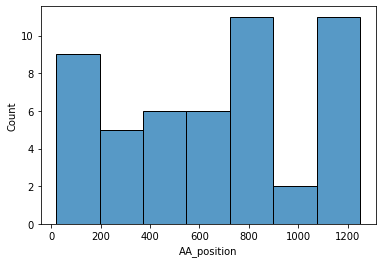

In [ ]:
sns.histplot(data=tabla_mutaciones_sample, x="AA_position")

Podemos modificar el tamaño de las columnas del histogramas con el parámetro "bin"



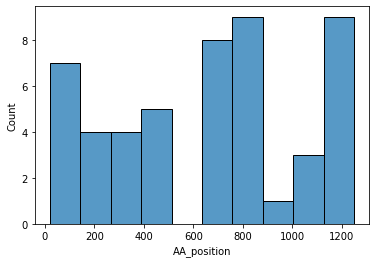

In [ ]:
sns.histplot(data=tabla_mutaciones_sample, x="AA_position",bins=10)

Luego vamos a realizar un grafico de tipo [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

La función para realizar este tipo de graficos en seaborn es:

```
sns.violinplot()
```

Antes de usar el comando, ingresá al link para ver los parámetros que toma este plot

Asi que vamos a seleccionar una agrupación determinada de datos para obtener una mejor visualización. Vamos a analizar todas las filas correspondientes al año 2020 y vamos a visualizar los datos por mes. 🗓️

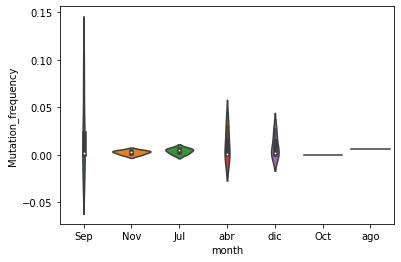

In [ ]:
tabla_mutaciones_sample_2020 = tabla_mutaciones_sample[tabla_mutaciones_sample['year'].str.contains('2,020')]
ax = sns.violinplot(data=tabla_mutaciones_sample_2020, y="Mutation_frequency",x="month")

A continuación les dejamos una imagen de como se ve este grafico realizado con todos los datos de la tabla

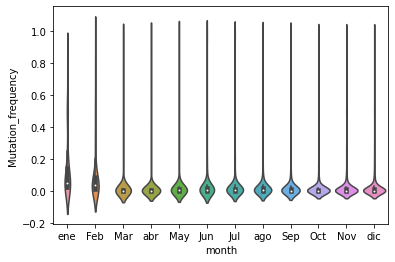

In [ ]:
#tabla_mutaciones_2020 = tabla_mutaciones[tabla_mutaciones['year'].str.contains('2,020')]
#tabla_mutaciones_2020 = tabla_mutaciones_2020[tabla_mutaciones_2020["Mutation_frequency"]<1]
#ax = sns.violinplot(data=tabla_mutaciones_2020, y="Mutation_frequency",x="month")

Por útlimo, vamos a realizar un grafico de tipo [displot](https://seaborn.pydata.org/tutorial/distributions.html).

La función para realizar este tipo de graficos en seaborn es:

```
sns.displot()
```

Antes de usar el comando, ingresá al link para ver los parámetros que toma este plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


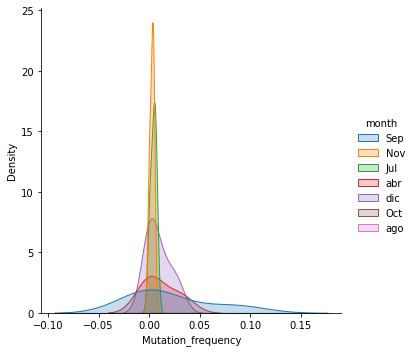

In [ ]:
 sns.displot(tabla_mutaciones_sample_2020, x="Mutation_frequency", hue="month", kind="kde", fill=True)

Por útlimo, vamos a realizar un grafico de tipo [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

La función para realizar este tipo de graficos en seaborn es:

```
sns.scatterplot()
```

Antes de usar el comando, ingresá al link para ver los parámetros que toma este plot

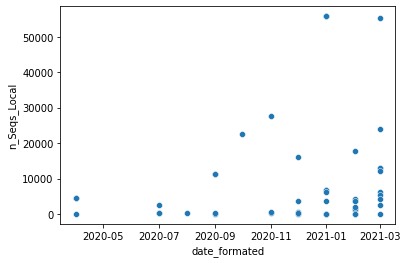

In [ ]:
sns.scatterplot(data=tabla_mutaciones_sample, y="n_Seqs_Local", x="date_formated")

Podemos diferenciar los datos con el parámetro "hue"

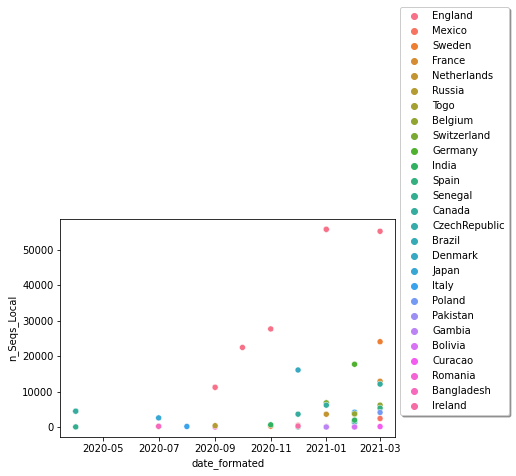

In [ ]:
sns.scatterplot(data=tabla_mutaciones_sample, y="n_Seqs_Local", x="date_formated",hue="Location")
plt.legend(loc='best',bbox_to_anchor =(1, 2), fancybox=True, shadow=True)




---


#Geolocalización con Pandas

También podemos generar graficos para esquematizar la localización de los datos.

Para hacerlo, vamos a uar la la librería [geopandas](https://geopandas.org/en/stable/)

Para realizar este grafico vamos a usar una nueva tabla que contiene la latitud y la longitud de las ciudades. 

In [ ]:
os.getcwd()
#path = '/content/drive/MyDrive/Workshop/'
path = '/content/drive/MyDrive/Events_organization/Workshops_shared_with_other_orgas/Workshop - Introducción a Python + Filogenia/Mutaciones_Spike_SARS2'
os.chdir(path)
data = 'GISAID_version20210703_S_mutations_MonthlyFreq_bydate_bylocation_geocoordenades.csv'
tabla_mutaciones_mundo = pd.read_csv(data, header=0, error_bad_lines=False)

tabla_mutaciones_mundo_sample = tabla_mutaciones_mundo.sample(n=50)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Para realizar el grafico, primero generamos el mapa del mundo y luego agregamos los puntos correspondientes a las muestras de la tabla de mutaciones

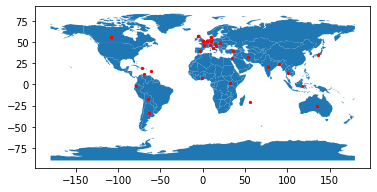

In [ ]:
geometry = [Point(xy) for xy in zip(tabla_mutaciones_mundo_sample['longitude'], tabla_mutaciones_mundo_sample['latitude'])]
gdf = GeoDataFrame(tabla_mutaciones_mundo_sample, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(), marker='o', color='red', markersize=5);

Ahora vamos a editar el tamaño de los puntos, usando como dato en número de mutaciones encontradas en las secuencias

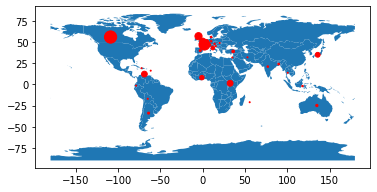

In [ ]:
geometry = [Point(xy) for xy in zip(tabla_mutaciones_mundo_sample['longitude'], tabla_mutaciones_mundo_sample['latitude'])]
gdf = GeoDataFrame(tabla_mutaciones_mundo_sample, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(), marker='o', color='red', markersize=tabla_mutaciones_mundo_sample['n_Muts']);

##Opcional:
Usando el siguiente comando pueden generar un mapa interactivo

In [ ]:
fig = px.scatter_geo(tabla_mutaciones_mundo_sample,lat='latitude',lon='longitude', hover_name="n_Seqs_Local")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()



---


# **Resúmen**

**Algunos métodos de los DataFrames para llevarte a casa**

Veamos un resumen de los métodos que podés encontrar en Pandas para trabajar con DataFrames: 

| Lectura/carga de datos | Limpieza de los datos | Estdistica de los datos |
|-------------	|----------	|---	|
| pd.read_csv() | pd.head() | pd.describe() |
| pd.read_table() | pd.fillna() |df.sample()|
| pd.read_excel() | pd.dropna() | pd.mean() |
| pd.read_sql() | pd.sort_values() | pd.median() |
| pd.read_json() | pd.groupby() | pd.std() |
| pd.to_csv() |pd.apply() | pd.min() |
| pd.DataFrame() | pd.append() | pd.max() |
| pd.concat() | pd.rename()  | pd.count() |
| pd.Series() | pd.set_index() | pd.corr() |
| pd.DataFrame.from_dict() |  pd.tail() | pd.hist() |